<a href="https://colab.research.google.com/github/sota-ogawa/TU-math-study/blob/main/chap9_Ex_Cm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

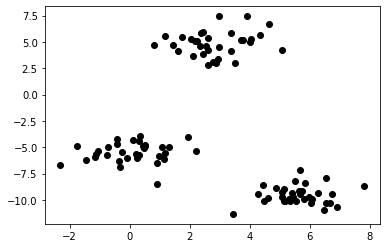

In [ ]:
#Chap09_02_02
# k-means法を使うためのインポート
from sklearn.cluster import KMeans

# データ取得のためのインポート
from sklearn.datasets import make_blobs

# サンプルデータ生成
# 注意：make_blobsは2つの値を返すため、一方は使用しない「 _ 」で受け取る
X, _ = make_blobs(random_state=10)

# グラフを描画
# colorのオプションで色付けができる
plt.scatter(X[:,0],X[:,1],color='black')

In [ ]:
# KMeansクラスの初期化
kmeans = KMeans(init='random',n_clusters=3)

# クラスターの重心を計算
kmeans.fit(X)

# クラスター番号を予測
y_pred = kmeans.predict(X)

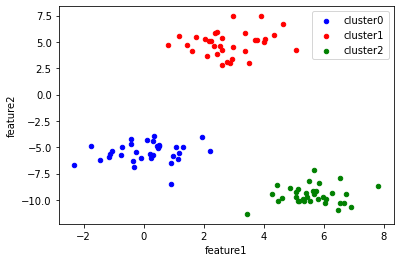

In [ ]:
# concatでデータを横に結合(axis=1を指定)
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)

# 上記のデータにて、X軸をfeature1、Y軸をfeature2、クラスター番号をclusterと列名指定
merge_data.columns = ['feature1','feature2','cluster']

# クラスタリング結果のグラフ化
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i],
                                           label=f'cluster{i}', ax=ax)

In [ ]:
# webからデータを取得したり、zipファイルを扱うためのライブラリをインポート
import requests, zipfile
import io

# データがあるurl の指定
zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

# データを取得して展開する
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

#対象データを読み込み
bank= pd.read_csv('bank-full.csv', sep=';')

# データの列の絞り込み
bank_sub = bank[['age','balance','campaign','previous']]

# 標準化
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)



Text(0, 0.5, 'Distortion')

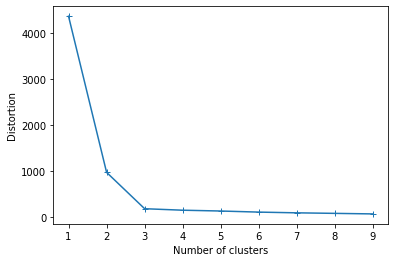

In [ ]:
#Chap09_Ex_02_04
# エルボー方による推定。クラスター数を1から10に増やして、それぞれの距離の総和を求める
dist_list =[]
for i in range(1,10):
    kmeans= KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)
    
# グラフを表示
plt.plot(range(1,10), dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

Text(0, 0.5, 'Distortion')

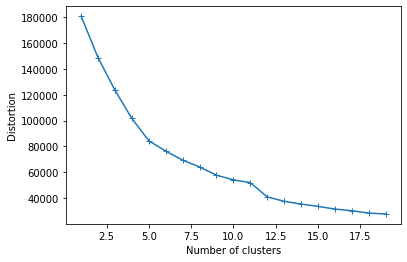

In [ ]:
# エルボー方による推定。クラスター数を1から20に増やして、それぞれの距離の総和を求める
dist_list =[]
for i in range(1,20):
    kmeans= KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)
    
# グラフを表示
plt.plot(range(1,20), dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

相関係数0.889:


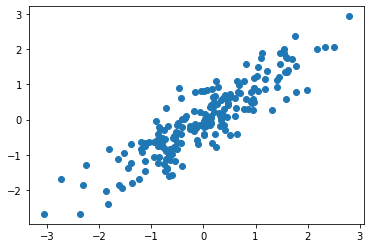

In [ ]:
#Chap09_Ex_03_01
from sklearn.preprocessing import StandardScaler

# RandomStateオブジェクトを作成
sample = np.random.RandomState(1)

#２つの乱数を生成
X = np.dot(sample.rand(2, 2), sample.randn(2, 200)).T

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 相関係数の算出とグラフ化
print('相関係数{:.3f}:'.format(sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]))
plt.scatter(X_std[:, 0], X_std[:, 1])

In [22]:
# インポート
from sklearn.decomposition import PCA

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)

PCA(n_components=2)

In [23]:
print(pca.components_)

[[-0.707 -0.707]
 [-0.707  0.707]]


In [24]:
print('各主成分の分散:{}'.format(pca.explained_variance_))

各主成分の分散:[1.899 0.111]


In [25]:
print('各主成分の分散割合:{}'.format(pca.explained_variance_ratio_))

各主成分の分散割合:[0.945 0.055]


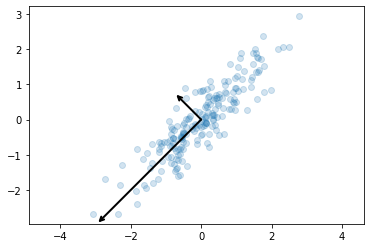

In [26]:
# パラメータ設定
arrowprops=dict(arrowstyle='->',
                linewidth=2,
                shrinkA=0, shrinkB=0)

# 矢印を描くための関数
def draw_vector(v0, v1):
    plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

# 元のデータをプロット
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)

# 主成分分析の2軸を矢印で表示する
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');

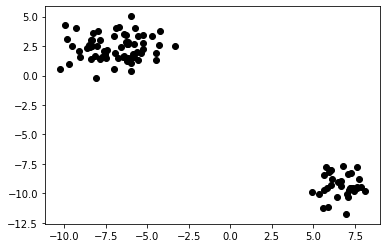

In [27]:
#Chap09_Cm_01
# 解答（1）　グラフ化
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=52)
plt.scatter(X[:,0], X[:,1], color='black')

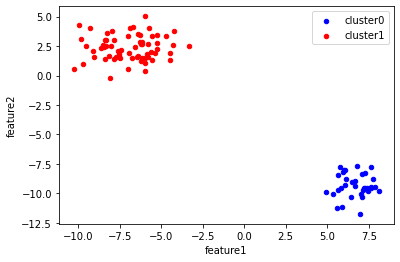

In [28]:
# 解答（2）　クラスター分析
kmeans = KMeans(init='random', n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 順にx座標、y座標、cluster番号のデータを横に結合するためconcatでaxis=1を指定しています。
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)
merge_data.columns = ['feature1','feature2','cluster']

# クラスタリング結果のグラフ化
ax = None
colors = ['blue', 'red']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(
        x='feature1', y='feature2', 
        color=colors[i], label=f'cluster{i}', ax=ax
    )

In [29]:
#Chap09_Cm_02
# 解答 （1）　主成分分析
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()

sc = StandardScaler()
sc.fit(iris.data)
X_std = sc.transform(iris.data)

# 主成分分析の実行
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('主成分分析前のデータ次元：{}'.format(iris.data.shape))
print('主成分分析後のデータ次元：{}'.format(X_pca.shape))

主成分分析前のデータ次元：(150, 4)
主成分分析後のデータ次元：(150, 2)


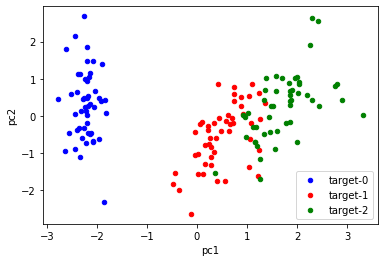

In [30]:
# 解答（2）　グラフ化
merge_data = pd.concat([pd.DataFrame(X_pca[:,0]), pd.DataFrame(X_pca[:,1]), pd.DataFrame(iris.target)], axis=1)
merge_data.columns = ['pc1','pc2', 'target']

# クラスタリング結果のグラフ化
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('target'):
    ax = data.plot.scatter(
        x='pc1', y='pc2',
        color=colors[i], label=f'target-{i}', ax=ax
    )

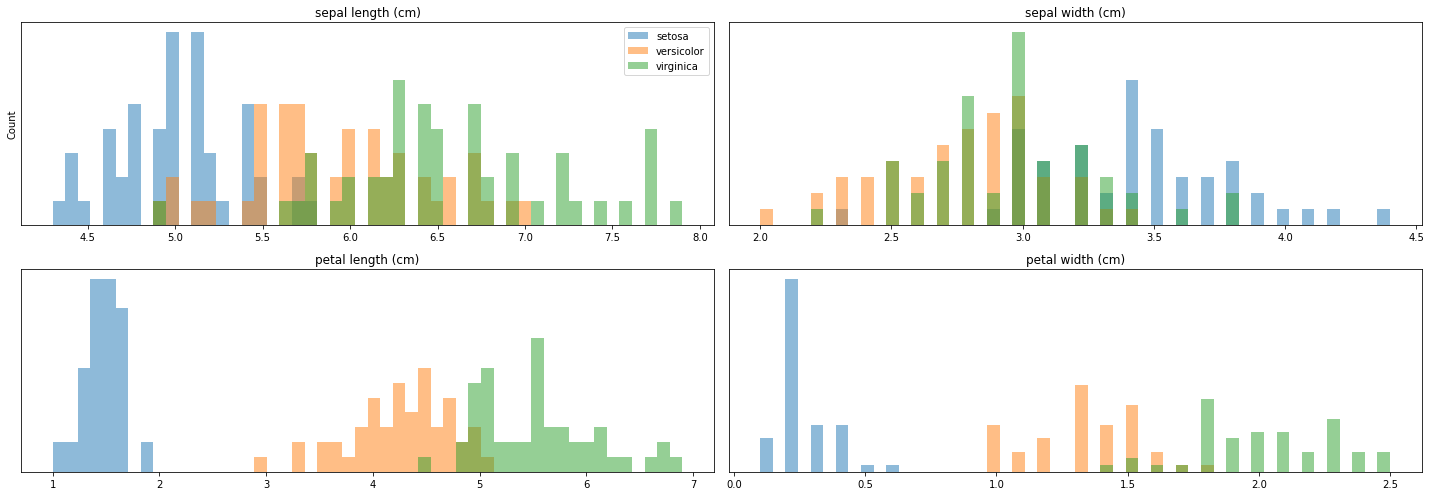

In [31]:
# 参考　目的変数とそれぞれの4つの説明変数との関係を示す
fig, axes = plt.subplots(2,2,figsize=(20,7))

iris_0 = iris.data[iris.target==0]
iris_1 = iris.data[iris.target==1]
iris_2 = iris.data[iris.target==2]

ax = axes.ravel()
for i in range(4):
    _,bins = np.histogram(iris.data[:,i],bins=50)
    ax[i].hist(iris_0[:,i],bins=bins,alpha=.5)
    ax[i].hist(iris_1[:,i],bins=bins,alpha=.5)
    ax[i].hist(iris_2[:,i],bins=bins,alpha=.5)
    ax[i].set_title(iris.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_ylabel('Count')
ax[0].legend(['setosa','versicolor','virginica'], loc='best')
fig.tight_layout()